Content and things to discuss are up to you, but we expect (at a minimum):
- Do you have data fully in hand and if not, what blockers are you facing? A: YES
- Have you done a full EDA on all of your data? A: YES
- Have you begun the modeling process? How accurate are your predictions so far? A: NO
- What blockers are you facing, including processing power, data acquisition, modeling difficulties, data cleaning, etc.? How can we help you overcome those challenges? A: figuring out how I want to model it
- Have you changed topics since your lightning talk? Since you submitted your Problem Statement and EDA? If so, do you have the necessary data in hand (and the requisite EDA completed) to continue moving forward? A: NO 
- What is your timeline for the next week and a half? What do you have to get done versus what would you like to get done? A: Figuring out my target and building the model 
- What topics do you want to discuss during your 1:1? A: Project Goals and suggestions

# CAPSTONE PROJECT- REGRESSION NOTEBOOOK - PATRICK VALADKA

#https://git.generalassemb.ly/DSI-EAST-1/capstone
-Goal of this project is to predict crime type, location, and date based on the available data

-Chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
-Key columns we're looking at will include: GO Report Date (LabelEncoded day of week and months)
        - GO Highest Offense Desc  [OR]  Highest NIBRS/UCR Offense Description  [label encoded]
        - GO Location Zip for [regression?] about generalized locations of crime [rape/sexual assualt obscured]
        - GO X Coordinate and GO Y Coordinate for location precision for mapping in Tableau  
        
- Use regression(?) around the types of crime, date, and location to establish a crime set to improve APD patrolling
- Motivation: I got broken into and want to determine the ideal location to move to in the near future

In [6]:
# importing some initial plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
# importing packages for running models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveRegressor

from datetime import datetime
from time import gmtime, strftime
%matplotlib inline

In [28]:
# importing dataset and getting some head
# chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
df = pd.read_csv('./2016_Annual_Crime_Data.csv')
df.head(1)

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D          78735.0            19.08   

   GO X Coordinate  GO Y Coordinate  
0        3067322.0       10062796.0

In [7]:
df['Highest NIBRS/UCR Offense Description'].value_counts()

Theft          26241
Burglary        5171
Agg Assault     2177
Auto Theft      2025
Robbery         1050
Rape             759
Murder            38
Name: Highest NIBRS/UCR Offense Description, dtype: int64

# START TRANSFORMING DATA 
- drop all the nulls for the GO Location Zip, GO Census Tract, GO X Coordinate, GO Y Coordinate
- drop the GO Primary Key and Clearance Date columns because they are basically useless
- create LabelEncoder columns for the days and months on the dataset
- change all NaN values for the Clearance Status to "N" 
- drop the .0 value off of the Go Location Zip column

In [ ]:
# drop the GO Primary Key and Clearance Date columns because they are basically useless
#df.drop(['GO Primary Key','Clearance Date'], axis=1, inplace=True)

In [ ]:
df.head(2)

In [9]:
# drop the na values from Zip
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['GO Location Zip'],how='all', inplace = True)

In [10]:
# transforming the zip location
df['GO Location Zip'] =  df['GO Location Zip'].astype('int32')

In [11]:
#recheck all nan are gone
df['GO Location Zip'].isnull().sum()

0

In [12]:
df.head(2)

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   
1     201610643.0               9.0  THEFT                            

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   
1                                 Theft       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   
1  219 E 6TH ST                                  ...                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D            78735            19.08   
1       4-Jan-16           G            78701            11.00   

   GO X Coordinate  GO Y Coordinate  
0        3067322.0       10062796.0  
1        3114957.0       10070462.0

In [29]:
# drop the na values from X and Y coordinate
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['Council District'],how='all', inplace = True)

In [30]:
df.dropna(subset = ['GO X Coordinate','GO Y Coordinate'],how='all', inplace = True)

In [31]:
df.dropna(subset = ['Clearance Status'],how='all', inplace = True)

In [32]:
# converting the GO Report Date to day, month
# 0 index starting on monday
df['weekday'] = pd.DatetimeIndex(df['GO Report Date']).dayofweek

In [ ]:
df.head(1000)
# 0= monday
# 1= tuesday
# 2= wednesday
# 3= thursday
# 4= friday
# 5= saturday 
# 6= sunday

In [34]:
df['new_date'] = pd.to_datetime(df['GO Report Date'])
pd.Timestamp(df.new_date[0]).dayofweek


4

In [403]:
# for loop to determine day of week of 'Go Report Date'

df['dow']=df['new_date'].dt.dayofweek

df.tail()

GO Primary Key  Council District         GO Highest Offense Desc  \
37456    2.016505e+10               7.0  THEFT                            
37457    2.016505e+10               9.0  THEFT                            
37458    2.016801e+10               1.0  BURGLARY OF VEHICLE              
37459    2.016801e+10               3.0  BURGLARY OF VEHICLE              
37460    2.016801e+10               9.0  BURGLARY OF VEHICLE              

      Highest NIBRS/UCR Offense Description GO Report Date  \
37456                                 Theft      31-Dec-16   
37457                                 Theft      31-Dec-16   
37458                                 Theft      31-Dec-16   
37459                                 Theft      31-Dec-16   
37460                                 Theft      31-Dec-16   

                                             GO Location Clearance Status  \
37456  8822 MC CANN DR                               ...                N   
37457  123 W 6TH ST                                  ...                N   
37458  5601 EXETER DR                                ...                N   
37459  101 HERGOTZ LN                                ...                N   
37460  701 W 28TH ST                                 ...                N   

      Clearance Date GO District  GO Location Zip  GO Census Tract  \
37456       3-Jan-17           B            78757            18.17   
37457       3-Jan-17           G            78701            11.00   
37458      16-Jan-17           I            78723            21.06   
37459      12-Jan-17           H            78742            23.10   
37460      16-Jan-17           B            78705             6.03   

       GO X Coordinate  GO Y Coordinate  weekday   new_date  dow Day_of_Week  \
37456        3117454.0       10109065.0        5 2016-12-31    5    Saturday   
37457        3113924.0       10070794.0        5 2016-12-31    5    Saturday   
37458        3132812.0       10084356.0        5 2016-12-31    5    Saturday   
37459        3131778.0       10062481.0        5 2016-12-31    5    Saturday   
37460        3113521.0       10079906.0        5 2016-12-31    5    Saturday   

      Month Year Day  
37456   Dec   16  31  
37457   Dec   16  31  
37458   Dec   16  31  
37459   Dec   16  31  
37460   Dec   16  31

In [37]:
df['Day_of_Week'] = pd.to_datetime(df['new_date'], format='%y/%m/%d').dt.weekday_name


In [39]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2016, 12, 31)
end_date = date(2017, 1, 1)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))

2016-12-31


In [40]:
df["Month"]=df["GO Report Date"].map(lambda x: x.split("-")[1])
df["Year"]=df["GO Report Date"].map(lambda x: x.split("-")[2])
df["Day"]=df["GO Report Date"].map(lambda x: x.split("-")[0])

In [47]:
df.head(1)

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D          78735.0            19.08   

   GO X Coordinate  GO Y Coordinate  weekday   new_date  dow Day_of_Week  \
0        3067322.0       10062796.0        4 2016-01-01    4      Friday   

  Month Year Day  
0   Jan   16   1

In [402]:
df['GO District'].value_counts()

D     5040
E     4403
B     4159
F     4154
I     4065
H     3955
A     3790
C     2646
G     2518
AP     154
88       1
Name: GO District, dtype: int64

# CAPSTONE PART 3
TO DO:

one hot encode/ get dummies of the crime highest column

go location zip for regression with crime stats

In [44]:
df_Months = pd.get_dummies(df['Month'])

In [60]:
df_new = pd.concat([df, df_Months],axis=1)
#df_new
#df_new = df.join(df_crimes)


In [61]:
df_new.drop(['GO Primary Key', 'Council District', 'Highest NIBRS/UCR Offense Description',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District','GO Census Tract', 
       'GO X Coordinate','GO Y Coordinate', 'weekday','dow','Year','GO Report Date'
        ], axis = 1, inplace = True)

In [62]:
df_new.columns

Index(['GO Highest Offense Desc', 'GO Location Zip', 'new_date', 'Day_of_Week',
       'Month', 'Day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [63]:
df_new.head()

GO Highest Offense Desc  GO Location Zip   new_date Day_of_Week  \
0  AGG ASLT ENHANC STRANGL/SUFFOC            78735 2016-01-01      Friday   
1  THEFT                                     78701 2016-01-01      Friday   
2  AGG ROBBERY/DEADLY WEAPON                 78753 2016-01-01      Friday   
3  THEFT                                     78701 2016-01-01      Friday   
5  DEADLY CONDUCT                            78724 2016-01-01      Friday   

  Month Day  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
1   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
2   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
3   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
5   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0

In [64]:
# transforming the zip location
df['GO Location Zip'] =  df['GO Location Zip'].astype('int32')
###
#df_new.reset_index()

#y = df_new.index

In [65]:
df_new.head()

GO Highest Offense Desc  GO Location Zip   new_date Day_of_Week  \
0  AGG ASLT ENHANC STRANGL/SUFFOC            78735 2016-01-01      Friday   
1  THEFT                                     78701 2016-01-01      Friday   
2  AGG ROBBERY/DEADLY WEAPON                 78753 2016-01-01      Friday   
3  THEFT                                     78701 2016-01-01      Friday   
5  DEADLY CONDUCT                            78724 2016-01-01      Friday   

  Month Day  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
1   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
2   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
3   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
5   Jan   1    0    0    0    0    1    0    0    0    0    0    0    0

In [401]:
df.dtypes

GO Primary Key                                  float64
Council District                                float64
GO Highest Offense Desc                          object
Highest NIBRS/UCR Offense Description            object
GO Report Date                                   object
GO Location                                      object
Clearance Status                                 object
Clearance Date                                   object
GO District                                      object
GO Location Zip                                   int32
GO Census Tract                                 float64
GO X Coordinate                                 float64
GO Y Coordinate                                 float64
weekday                                           int64
new_date                                 datetime64[ns]
dow                                               int64
Day_of_Week                                      object
Month                                           

## NEXT STEPS:

creating summary columns that have # of crimes per district calculation and classifying based on that


# ideas to hypothesis test: crimes for days of week?
# 
# new df --> sum the number of each crime in each district
#
# 

In [68]:
#df['preTestScore'].groupby([df['regiment'], df['company']]).mean().unstack()
df_new.columns

Index(['GO Highest Offense Desc', 'GO Location Zip', 'new_date', 'Day_of_Week',
       'Month', 'Day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [92]:
df_new[('GO Location Zip')].unique()

array([78735, 78701, 78753, 78724, 78741, 78704, 78748, 78758, 78744,
       78747, 78756, 78759, 78723, 78745, 78749, 78751, 78752, 78731,
       78702, 78722, 78705, 78757, 78721, 78739, 78729, 78613, 78617,
       78746, 78750, 78719, 78703, 78736, 78653, 78727, 78652, 78754,
       78726, 78717, 78660, 78725, 78712, 78730, 78742, 78728, 78732, 78737])

In [102]:
df_78704 = df_new.loc[df_new['GO Location Zip'] == 78704]

In [104]:
df_78704.head(20)

GO Highest Offense Desc  GO Location Zip   new_date Day_of_Week  \
8    AGG ASLT STRANGLE/SUFFOCATE               78704 2016-01-01      Friday   
16   AGG ASLT STRANGLE/SUFFOCATE               78704 2016-01-01      Friday   
20   BURGLARY OF RESIDENCE                     78704 2016-01-01      Friday   
51   BURGLARY OF VEHICLE                       78704 2016-01-01      Friday   
61   BURGLARY OF VEHICLE                       78704 2016-01-01      Friday   
114  AUTO THEFT                                78704 2016-01-02    Saturday   
116  AUTO THEFT                                78704 2016-01-02    Saturday   
128  BURGLARY OF VEHICLE                       78704 2016-01-02    Saturday   
130  BURGLARY OF VEHICLE                       78704 2016-01-02    Saturday   
137  THEFT                                     78704 2016-01-02    Saturday   
140  THEFT                                     78704 2016-01-02    Saturday   
157  THEFT OF BICYCLE                          78704 2016-01-02    Saturday   
161  THEFT                                     78704 2016-01-03      Sunday   
198  AGG ASSAULT                               78704 2016-01-03      Sunday   
219  THEFT                                     78704 2016-01-03      Sunday   
241  THEFT OF BICYCLE                          78704 2016-01-03      Sunday   
245  BURGLARY OF VEHICLE                       78704 2016-01-04      Monday   
267  BURGLARY OF RESIDENCE                     78704 2016-01-04      Monday   
283  THEFT BY SHOPLIFTING                      78704 2016-01-04      Monday   
294  BURGLARY OF VEHICLE                       78704 2016-01-04      Monday   

    Month Day  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
8     Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
16    Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
20    Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
51    Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
61    Jan   1    0    0    0    0    1    0    0    0    0    0    0    0  
114   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
116   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
128   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
130   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
137   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
140   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
157   Jan   2    0    0    0    0    1    0    0    0    0    0    0    0  
161   Jan   3    0    0    0    0    1    0    0    0    0    0    0    0  
198   Jan   3    0    0    0    0    1    0    0    0    0    0    0    0  
219   Jan   3    0    0    0    0    1    0    0    0    0    0    0    0  
241   Jan   3    0    0    0    0    1    0    0    0    0    0    0    0  
245   Jan   4    0    0    0    0    1    0    0    0    0    0    0    0  
267   Jan   4    0    0    0    0    1    0    0    0    0    0    0    0  
283   Jan   4    0    0    0    0    1    0    0    0    0    0    0    0  
294   Jan   4    0    0    0    0    1    0    0    0    0    0    0    0

In [180]:
df_78704['GO Highest Offense Desc Stripped'] = df_78704['GO Highest Offense Desc'].str.strip()

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
foo.str.strip()

51    BURGLARY OF VEHICLE
Name: GO Highest Offense Desc, dtype: object

In [150]:
df_78704.loc[df_78704['GO Highest Offense Desc'] == 'BURGLARY OF VEHICLE']

Empty DataFrame
Columns: [GO Highest Offense Desc, GO Location Zip, new_date, Day_of_Week, Month, Day, Apr, Aug, Dec, Feb, Jan, Jul, Jun, Mar, May, Nov, Oct, Sep]
Index: []

In [192]:
df_78704_cars = df_78704.loc[(df_78704['GO Highest Offense Desc'] == 'BURGLARY OF VEHICLE') \
                        | (df_78704['GO Highest Offense Desc'] == 'THEFT FROM AUTO') \
                        | (df_78704['GO Highest Offense Desc'] == 'AUTO THEFT') \
                        | (df_78704['GO Highest Offense Desc'] == 'THEFT OF LICENSE PLATE') \
                        | (df_78704['GO Highest Offense Desc'] == 'BURG NON RESIDENCE SHEDS') \
                        |(df_78704['GO Highest Offense Desc'] == 'THEFT OF AUTO PARTS') \
                        |(df_78704['GO Highest Offense Desc'] == 'THEFT CATALYTIC CONVERTER') \
                        |(df_78704['GO Highest Offense Desc'] == 'THEFT OF TRAILER')]

In [194]:
df_78704_cars

GO Highest Offense Desc  GO Location Zip   new_date Day_of_Week Month  \
51          BURGLARY OF VEHICLE            78704 2016-01-01      Friday   Jan   
61          BURGLARY OF VEHICLE            78704 2016-01-01      Friday   Jan   
114                  AUTO THEFT            78704 2016-01-02    Saturday   Jan   
116                  AUTO THEFT            78704 2016-01-02    Saturday   Jan   
128         BURGLARY OF VEHICLE            78704 2016-01-02    Saturday   Jan   
130         BURGLARY OF VEHICLE            78704 2016-01-02    Saturday   Jan   
245         BURGLARY OF VEHICLE            78704 2016-01-04      Monday   Jan   
294         BURGLARY OF VEHICLE            78704 2016-01-04      Monday   Jan   
330      THEFT OF LICENSE PLATE            78704 2016-01-04      Monday   Jan   
390                  AUTO THEFT            78704 2016-01-05     Tuesday   Jan   
508                  AUTO THEFT            78704 2016-01-06   Wednesday   Jan   
513                  AUTO THEFT            78704 2016-01-06   Wednesday   Jan   
555         BURGLARY OF VEHICLE            78704 2016-01-06   Wednesday   Jan   
577         BURGLARY OF VEHICLE            78704 2016-01-06   Wednesday   Jan   
588         BURGLARY OF VEHICLE            78704 2016-01-06   Wednesday   Jan   
648         BURGLARY OF VEHICLE            78704 2016-01-07    Thursday   Jan   
651         BURGLARY OF VEHICLE            78704 2016-01-07    Thursday   Jan   
655         BURGLARY OF VEHICLE            78704 2016-01-07    Thursday   Jan   
675         BURGLARY OF VEHICLE            78704 2016-01-07    Thursday   Jan   
679         THEFT OF AUTO PARTS            78704 2016-01-07    Thursday   Jan   
703         BURGLARY OF VEHICLE            78704 2016-01-07    Thursday   Jan   
742                  AUTO THEFT            78704 2016-01-08      Friday   Jan   
772         BURGLARY OF VEHICLE            78704 2016-01-08      Friday   Jan   
803         BURGLARY OF VEHICLE            78704 2016-01-08      Friday   Jan   
934                  AUTO THEFT            78704 2016-01-10      Sunday   Jan   
966         BURGLARY OF VEHICLE            78704 2016-01-10      Sunday   Jan   
968         BURGLARY OF VEHICLE            78704 2016-01-10      Sunday   Jan   
969         BURGLARY OF VEHICLE            78704 2016-01-10      Sunday   Jan   
976         BURGLARY OF VEHICLE            78704 2016-01-10      Sunday   Jan   
1071        BURGLARY OF VEHICLE            78704 2016-01-11      Monday   Jan   
...                         ...              ...        ...         ...   ...   
36438       BURGLARY OF VEHICLE            78704 2016-12-21   Wednesday   Dec   
36465                AUTO THEFT            78704 2016-12-22    Thursday   Dec   
36467       BURGLARY OF VEHICLE            78704 2016-12-22    Thursday   Dec   
36503       BURGLARY OF VEHICLE            78704 2016-12-22    Thursday   Dec   
36514       BURGLARY OF VEHICLE            78704 2016-12-22    Thursday   Dec   
36531       BURGLARY OF VEHICLE            78704 2016-12-22    Thursday   Dec   
36577                AUTO THEFT            78704 2016-12-23      Friday   Dec   
36623       BURGLARY OF VEHICLE            78704 2016-12-23      Friday   Dec   
36648       BURGLARY OF VEHICLE            78704 2016-12-23      Friday   Dec   
36764                AUTO THEFT            78704 2016-12-25      Sunday   Dec   
36776       BURGLARY OF VEHICLE            78704 2016-12-25      Sunday   Dec   
36798           THEFT FROM AUTO            78704 2016-12-25      Sunday   Dec   
36801       BURGLARY OF VEHICLE            78704 2016-12-25      Sunday   Dec   
36816       BURGLARY OF VEHICLE            78704 2016-12-25      Sunday   Dec   
36875       BURGLARY OF VEHICLE            78704 2016-12-26      Monday   Dec   
36889       BURGLARY OF VEHICLE            78704 2016-12-26      Monday   Dec   
36890       BURGLARY OF VEHICLE            78704 2016-12-26      Monday   Dec   
36901           THEFT FROM AUTO        

In [253]:
df_78704_cars.drop('GO Highest Offense Desc', axis=1)
df_78704_cars.drop('GO Highest Offense Desc', axis=1)
# get new_date as time object and nested group by and value is count of offenses

GO Location Zip   new_date Day_of_Week Month Day  Apr  Aug  Dec  Feb  \
51               78704 2016-01-01      Friday   Jan   1    0    0    0    0   
61               78704 2016-01-01      Friday   Jan   1    0    0    0    0   
114              78704 2016-01-02    Saturday   Jan   2    0    0    0    0   
116              78704 2016-01-02    Saturday   Jan   2    0    0    0    0   
128              78704 2016-01-02    Saturday   Jan   2    0    0    0    0   
130              78704 2016-01-02    Saturday   Jan   2    0    0    0    0   
245              78704 2016-01-04      Monday   Jan   4    0    0    0    0   
294              78704 2016-01-04      Monday   Jan   4    0    0    0    0   
330              78704 2016-01-04      Monday   Jan   4    0    0    0    0   
390              78704 2016-01-05     Tuesday   Jan   5    0    0    0    0   
508              78704 2016-01-06   Wednesday   Jan   6    0    0    0    0   
513              78704 2016-01-06   Wednesday   Jan   6    0    0    0    0   
555              78704 2016-01-06   Wednesday   Jan   6    0    0    0    0   
577              78704 2016-01-06   Wednesday   Jan   6    0    0    0    0   
588              78704 2016-01-06   Wednesday   Jan   6    0    0    0    0   
648              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
651              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
655              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
675              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
679              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
703              78704 2016-01-07    Thursday   Jan   7    0    0    0    0   
742              78704 2016-01-08      Friday   Jan   8    0    0    0    0   
772              78704 2016-01-08      Friday   Jan   8    0    0    0    0   
803              78704 2016-01-08      Friday   Jan   8    0    0    0    0   
934              78704 2016-01-10      Sunday   Jan  10    0    0    0    0   
966              78704 2016-01-10      Sunday   Jan  10    0    0    0    0   
968              78704 2016-01-10      Sunday   Jan  10    0    0    0    0   
969              78704 2016-01-10      Sunday   Jan  10    0    0    0    0   
976              78704 2016-01-10      Sunday   Jan  10    0    0    0    0   
1071             78704 2016-01-11      Monday   Jan  11    0    0    0    0   
...                ...        ...         ...   ...  ..  ...  ...  ...  ...   
36438            78704 2016-12-21   Wednesday   Dec  21    0    0    1    0   
36465            78704 2016-12-22    Thursday   Dec  22    0    0    1    0   
36467            78704 2016-12-22    Thursday   Dec  22    0    0    1    0   
36503            78704 2016-12-22    Thursday   Dec  22    0    0    1    0   
36514            78704 2016-12-22    Thursday   Dec  22    0    0    1    0   
36531            78704 2016-12-22    Thursday   Dec  22    0    0    1    0   
36577            78704 2016-12-23      Friday   Dec  23    0    0    1    0   
36623            78704 2016-12-23      Friday   Dec  23    0    0    1    0   
36648            78704 2016-12-23      Friday   Dec  23    0    0    1    0   
36764            78704 2016-12-25      Sunday   Dec  25    0    0    1    0   
36776            78704 2016-12-25      Sunday   Dec  25    0    0    1    0   
36798            78704 2016-12-25      Sunday   Dec  25    0    0    1    0   
36801            78704 2016-12-25      Sunday   Dec  25    0    0    1    0   
36816            78704 2016-12-25      Sunday   Dec  25    0    0    1    0   
36875            78704 2016-12-26      Monday   Dec  26    0    0    1    0   
36889            78704 2016-12-26      Monday   Dec  26    0    0    1    0   
36890            78704 2016-12-26      Monday   Dec  26    0    0    1    0   
36901            78704 2016-12-26      Monday   Dec  26    0    0    1    0   
36924            78704 2016-12-27     Tuesday   Dec  27  

In [257]:
df_78704_cars.dtypes

GO Highest Offense Desc                     object
GO Location Zip                              int32
new_date                            datetime64[ns]
Day_of_Week                                 object
Month                                       object
Day                                         object
Apr                                          uint8
Aug                                          uint8
Dec                                          uint8
Feb                                          uint8
Jan                                          uint8
Jul                                          uint8
Jun                                          uint8
Mar                                          uint8
May                                          uint8
Nov                                          uint8
Oct                                          uint8
Sep                                          uint8
GO Highest Offense Desc Stripped            object
dtype: object

In [268]:
# get new_date as time object and nested group by and value is count of offenses
#df['new_date'].dt.
df_78704_cars.groupby(df_78704_cars['new_date'].dt.month).count()
#foo = df['new_date'].dt.month
#= pd.to_datetime(df['GO Report Date'])

#pd.Timestamp(df.new_date[0]).dayofweek

GO Highest Offense Desc  GO Location Zip  new_date  Day_of_Week  \
new_date                                                                    
1                              78               78        78           78   
2                              52               52        52           52   
3                              88               88        88           88   
4                              72               72        72           72   
5                              62               62        62           62   
6                             105              105       105          105   
7                              75               75        75           75   
8                              60               60        60           60   
9                              82               82        82           82   
10                             83               83        83           83   
11                             74               74        74           74   
12                             66               66        66           66   

          Month  Day  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
new_date                                                                      
1            78   78   78   78   78   78   78   78   78   78   78   78   78   
2            52   52   52   52   52   52   52   52   52   52   52   52   52   
3            88   88   88   88   88   88   88   88   88   88   88   88   88   
4            72   72   72   72   72   72   72   72   72   72   72   72   72   
5            62   62   62   62   62   62   62   62   62   62   62   62   62   
6           105  105  105  105  105  105  105  105  105  105  105  105  105   
7            75   75   75   75   75   75   75   75   75   75   75   75   75   
8            60   60   60   60   60   60   60   60   60   60   60   60   60   
9            82   82   82   82   82   82   82   82   82   82   82   82   82   
10           83   83   83   83   83   83   83   83   83   83   83   83   83   
11           74   74   74   74   74   74   74   74   74   74   74   74   74   
12           66   66   66   66   66   66   66   66   66   66   66   66   66   

          Sep  GO Highest Offense Desc Stripped  
new_date                                         
1          78                                78  
2          52                                52  
3          88                                88  
4          72                                72  
5          62                                62  
6         105                               105  
7          75                                75  
8          60                                60  
9          82                                82  
10         83                                83  
11         74                                74  
12         66                                66

In [284]:
df_78704_cars.columns

Index(['GO Highest Offense Desc', 'GO Location Zip', 'new_date', 'Day_of_Week',
       'Month', 'Day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'GO Highest Offense Desc Stripped'],
      dtype='object')

In [288]:
#df_78704_cars.drop(['GO Highest Offense Desc Stripped'], axis=0, inplace=True)
df_78704_cars.drop('GO Highest Offense Desc Stripped', axis=1)

GO Highest Offense Desc  GO Location Zip  new_date  Day_of_Week  \
new_date                                                                    
1                              78               78        78           78   
2                              52               52        52           52   
3                              88               88        88           88   
4                              72               72        72           72   
5                              62               62        62           62   
6                             105              105       105          105   
7                              75               75        75           75   
8                              60               60        60           60   
9                              82               82        82           82   
10                             83               83        83           83   
11                             74               74        74           74   
12                             66               66        66           66   

          Month  Day  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
new_date                                                                      
1            78   78   78   78   78   78   78   78   78   78   78   78   78   
2            52   52   52   52   52   52   52   52   52   52   52   52   52   
3            88   88   88   88   88   88   88   88   88   88   88   88   88   
4            72   72   72   72   72   72   72   72   72   72   72   72   72   
5            62   62   62   62   62   62   62   62   62   62   62   62   62   
6           105  105  105  105  105  105  105  105  105  105  105  105  105   
7            75   75   75   75   75   75   75   75   75   75   75   75   75   
8            60   60   60   60   60   60   60   60   60   60   60   60   60   
9            82   82   82   82   82   82   82   82   82   82   82   82   82   
10           83   83   83   83   83   83   83   83   83   83   83   83   83   
11           74   74   74   74   74   74   74   74   74   74   74   74   74   
12           66   66   66   66   66   66   66   66   66   66   66   66   66   

          Sep  
new_date       
1          78  
2          52  
3          88  
4          72  
5          62  
6         105  
7          75  
8          60  
9          82  
10         83  
11         74  
12         66

In [283]:
df_78704_cars = df_78704_cars.groupby(df_78704_cars['new_date'].dt.month).count()

In [294]:
df_78704_cars.drop(['GO Location Zip', 'Day_of_Week',
       'Month', 'Day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'GO Highest Offense Desc Stripped'], axis=1, inplace=True)

In [299]:
df_78704_cars

GO Highest Offense Desc
new_date                         
1                              78
2                              52
3                              88
4                              72
5                              62
6                             105
7                              75
8                              60
9                              82
10                             83
11                             74
12                             66

In [263]:
foo.dt.month

0         1
1         1
2         1
3         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
19        1
20        1
21        1
22        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
         ..
37428    12
37429    12
37430    12
37431    12
37432    12
37433    12
37435    12
37436    12
37437    12
37438    12
37439    12
37440    12
37441    12
37442    12
37444    12
37445    12
37446    12
37447    12
37448    12
37449    12
37450    12
37451    12
37452    12
37453    12
37455    12
37456    12
37457    12
37458    12
37459    12
37460    12
Name: new_date, Length: 34885, dtype: int64

In [332]:
ts= df_78704_cars

In [333]:
ts

GO Highest Offense Desc
new_date                         
1                              78
2                              52
3                              88
4                              72
5                              62
6                             105
7                              75
8                              60
9                              82
10                             83
11                             74
12                             66

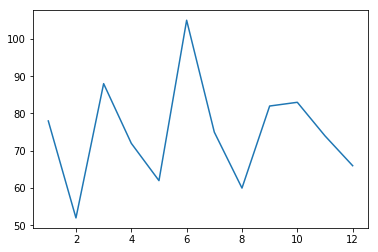

In [349]:

plt.plot(ts)

In [385]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=2)
    rolstd = pd.rolling_std(timeseries, window=2)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of 78704 Vehicle Crimes')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  """
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).std()
  


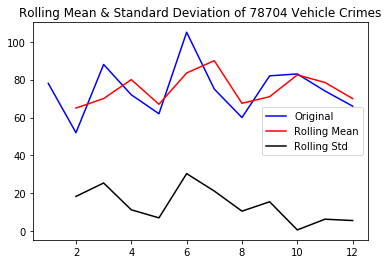

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [386]:
test_stationarity(ts)

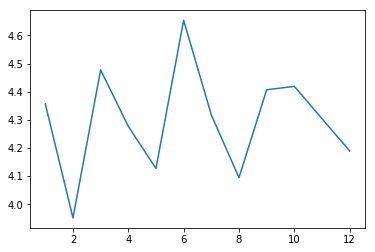

In [378]:
ts_log = np.log(ts)
plt.plot(ts_log)

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


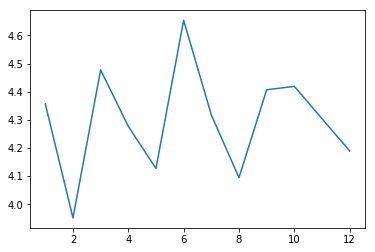

In [379]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [380]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

GO Highest Offense Desc
new_date                         
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8                             NaN
9                             NaN
10                            NaN
11                            NaN
12                      -0.108192

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  """
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).std()
  


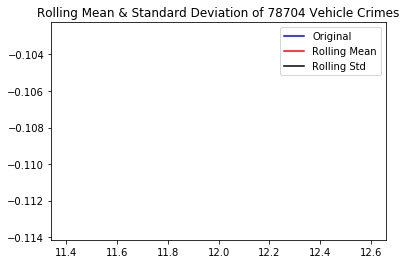

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [387]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


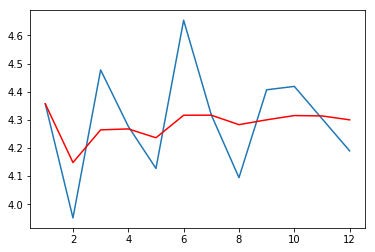

In [388]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  """
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).std()
  


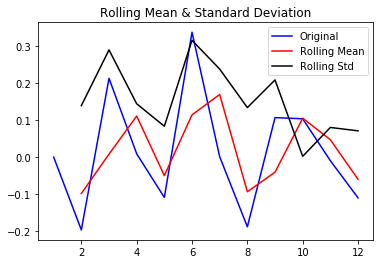

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [384]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

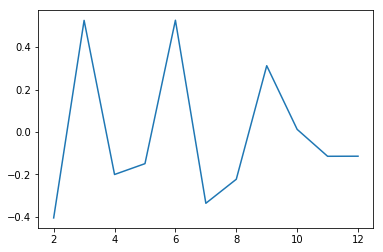

In [389]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  """
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).std()
  


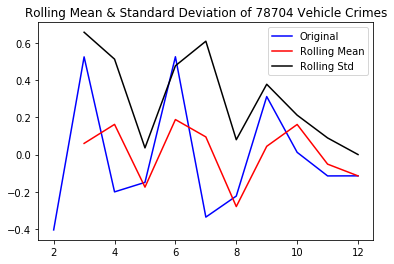

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [390]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [391]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [392]:
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=9, method='ols')

Text(0.5,1,'Autocorrelation Function')

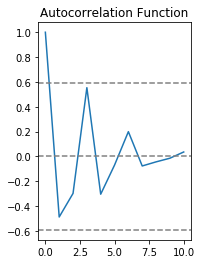

In [393]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [348]:
len(df_78704['GO Highest Offense Desc'][:1])

1

In [331]:
df_78704['GO Highest Offense Desc'].value_counts()

BURGLARY OF VEHICLE               636
THEFT                             627
THEFT BY SHOPLIFTING              232
BURGLARY OF RESIDENCE             189
THEFT OF BICYCLE                  165
AUTO THEFT                        162
BURGLARY NON RESIDENCE             94
AGG ASSAULT                        49
THEFT FROM AUTO                    43
AGG ASLT STRANGLE/SUFFOCATE        28
THEFT OF LICENSE PLATE             23
THEFT FROM BUILDING                21
BURG NON RESIDENCE SHEDS           16
THEFT FROM PERSON                  15
AGG ROBBERY/DEADLY WEAPON          14
AGG ASSAULT FAM/DATE VIOLENCE      12
ROBBERY BY ASSAULT                 11
THEFT OF AUTO PARTS                10
ROBBERY BY THREAT                   9
THEFT OF TRAILER                    6
BREACH OF COMPUTER SECURITY         5
BURGLARY OF COIN-OP MACHINE         2
AGG ASSAULT WITH MOTOR VEH          2
DEADLY CONDUCT                      2
THEFT CATALYTIC CONVERTER           1
AGG ASLT ENHANC STRANGL/SUFFOC      1
MURDER      

In [105]:
df_78704['Month'].value_counts()

Jun    239
Oct    219
Mar    216
Jan    214
Nov    205
Sep    197
Dec    197
May    190
Apr    184
Aug    177
Jul    177
Feb    165
Name: Month, dtype: int64

In [106]:
df_78704_months  = df_78704['Month'].value_counts()

In [109]:
df_78704_months

Jun    239
Oct    219
Mar    216
Jan    214
Nov    205
Sep    197
Dec    197
May    190
Apr    184
Aug    177
Jul    177
Feb    165
Name: Month, dtype: int64

In [199]:
# https://github.com/sflender/crime/blob/master/crime.ipynb

In [78]:
#df_new['Month','Theft'].value_counts()

In [223]:
#weekday vs weekend for crime


# for every instance of theft in df -- binary classifier for weekend/weekday 

# then roll to each type of theft for each weekday/weekend

#assumption of # of specific crime sets for each specific day

In [397]:
from statsmodels.tsa.arima_model import ARIMA